In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Loading the pepared dataset with implicit internal grouping

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ensemble-art/Dynamic-Logistic-Ensembles/main/allwine.csv",index_col = 0)

## Task 1 : Implement the simple logistic regression model

#### Goal:
To predict "quality" by the 10 features - fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, density, pH, sulphates, and alcohol.

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.743787          0.805266    -1.455948       -0.541531  -0.334525   
1      -0.520914          1.798500    -1.455948       -0.047918   0.129345   
2      -0.520914          1.136344    -1.251203       -0.259467   0.002835   
3       1.373509         -1.512280     1.410480       -0.541531  -0.355610   
4      -0.743787          0.805266    -1.455948       -0.541531  -0.334525   

   free sulfur dioxide   density        pH  sulphates   alcohol  quality  
0            -0.539436 -0.978159  0.146723  -0.755850 -1.297136        0  
1             0.787432 -0.998211 -1.220838  -0.062351 -0.960761        0  
2            -0.160331 -0.994200 -0.956148  -0.235726 -0.960761        0  
3             0.029222 -0.974148 -1.397297  -0.640267 -0.960761        1  
4            -0.539436 -0.978159  0.146723  -0.755850 -1.297136        0

In [ ]:
df.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   3.198000e+03      3.198000e+03  3.198000e+03    3.198000e+03   
mean   -2.982813e-16     -4.436726e-16  1.377538e-16    8.182601e-17   
std     1.000156e+00      1.000156e+00  1.000156e+00    1.000156e+00   
min    -2.303900e+00     -2.395155e+00 -1.623825e+00   -1.246692e+00   
25%    -6.880688e-01     -7.413923e-01 -9.041204e-01   -4.710149e-01   
50%    -1.883037e-01     -3.776619e-02 -6.651164e-02   -2.594666e-01   
75%     5.638545e-01      6.221545e-01  7.962457e-01    6.705718e-02   
max     4.580738e+00      5.932391e+00  3.824068e+00    9.138676e+00   

          chlorides  free sulfur dioxide       density            pH  \
count  3.198000e+03         3.198000e+03  3.198000e+03  3.198000e+03   
mean  -1.541571e-16        -2.738324e-16 -2.785521e-15  2.748757e-15   
std    1.000156e+00         1.000156e+00  1.000156e+00  1.000156e+00   
min   -1.683967e+00        -1.487200e+00 -1.133162e+00 -3.250120e+00   
25%   -3.766953e-01        -7.930922e-01 -9.992135e-01 -7.796891e-01   
50%   -1.744349e-01        -2.140109e-01 -7.166201e-04 -2.683110e-03   
75%    8.597896e-02         5.481191e-01  9.990931e-01  7.564772e-01   
max    1.115258e+01         5.245422e+00  1.140202e+00  3.769595e+00   

          sulphates       alcohol      quality  
count  3.198000e+03  3.198000e+03  3198.000000  
mean  -4.792393e-16 -1.244575e-15     0.534709  
std    1.000156e+00  1.000156e+00     0.498872  
min   -2.085055e+00 -2.138075e+00     0.000000  
25%   -6.402666e-01 -7.137768e-01     0.000000  
50%   -1.977143e-01 -1.262511e-01     1.000000  
75%    4.338530e-01  6.383188e-01     1.000000  
max    7.944553e+00  4.311531e+00     1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3198 entries, 0 to 3197
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        3198 non-null   float64
 1   volatile acidity     3198 non-null   float64
 2   citric acid          3198 non-null   float64
 3   residual sugar       3198 non-null   float64
 4   chlorides            3198 non-null   float64
 5   free sulfur dioxide  3198 non-null   float64
 6   density              3198 non-null   float64
 7   pH                   3198 non-null   float64
 8   sulphates            3198 non-null   float64
 9   alcohol              3198 non-null   float64
 10  quality              3198 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 299.8 KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


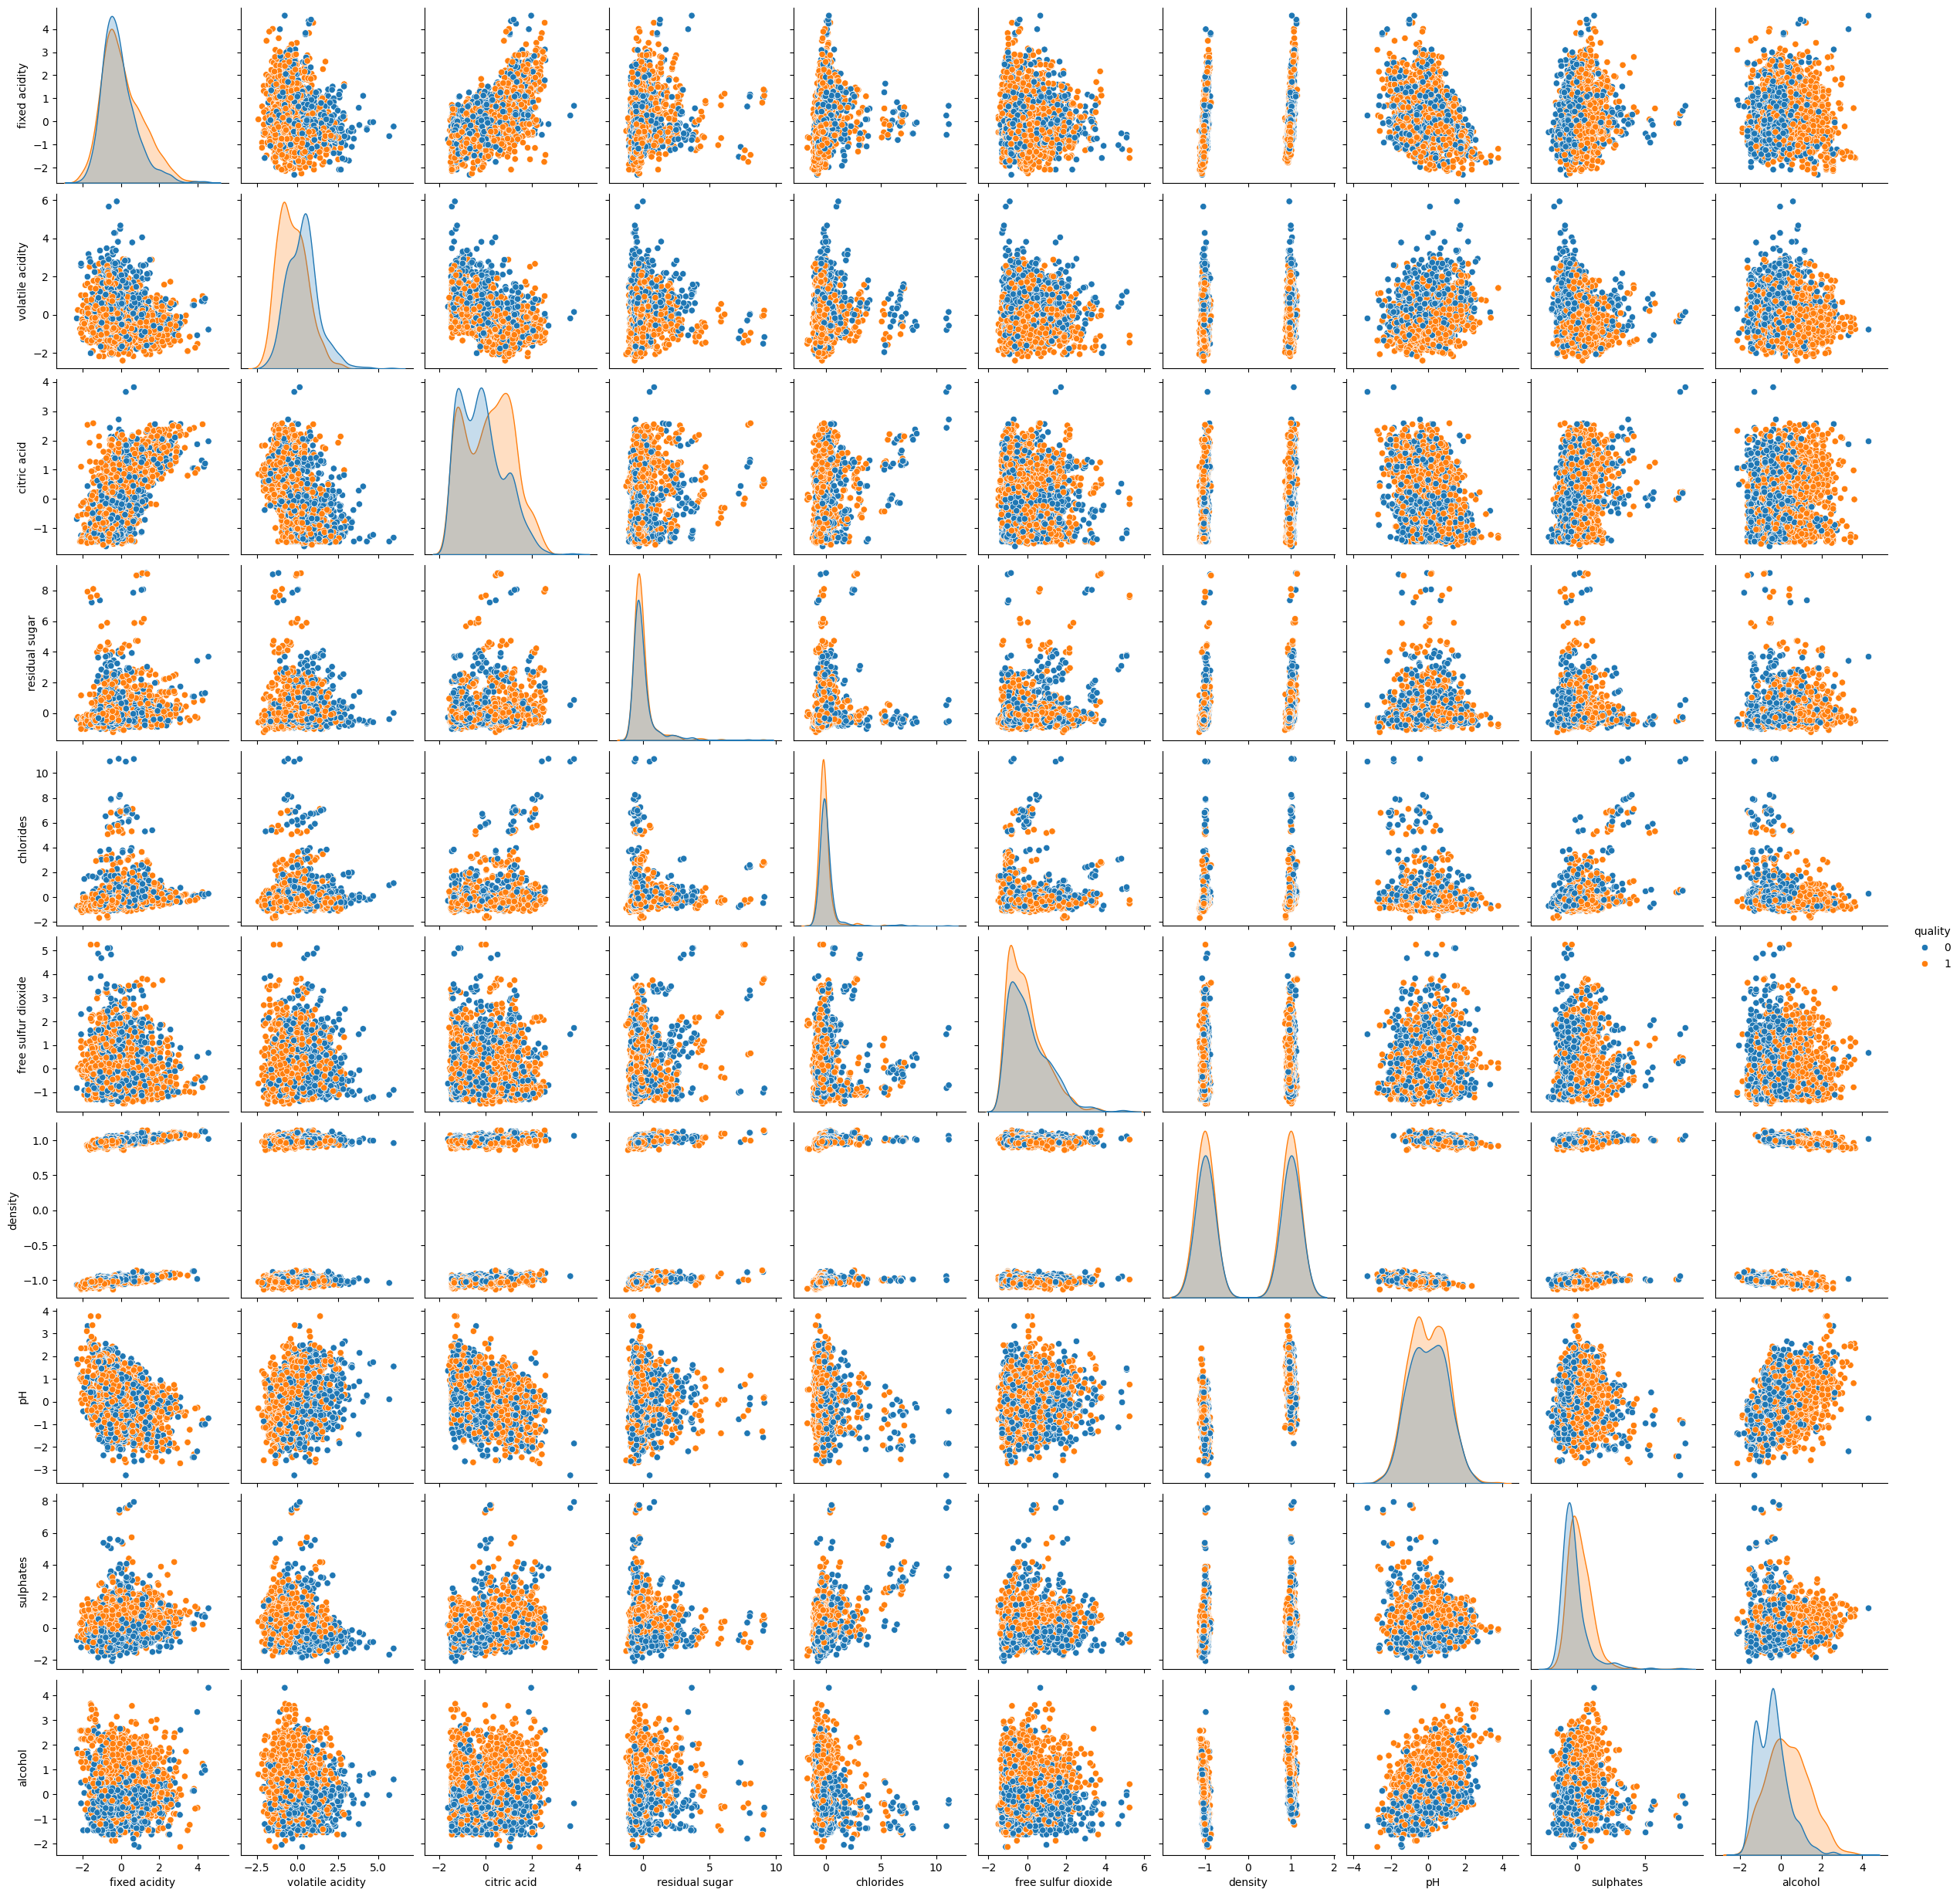

In [ ]:
sns.pairplot(df, hue='quality', size=2.5)

It is evident there is no clear decision boundary

<AxesSubplot:>

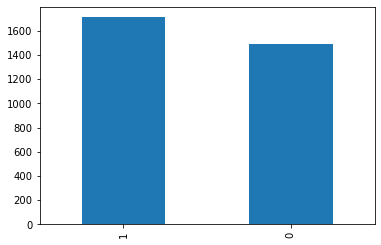

In [ ]:
df['quality'].value_counts().plot.bar()

Class balanced, dataset is balanced

### Outlier check

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

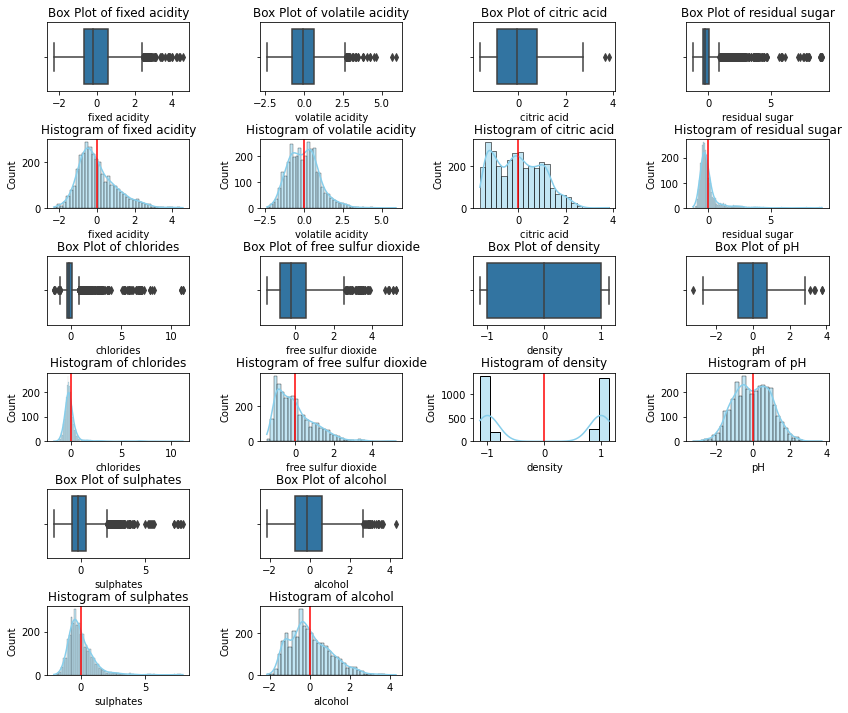

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of columns
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
           'alcohol']



# Define number of rows and columns for subplots
num_rows = 6
num_cols = 4
position_set = []
for row_set in range(int(num_rows/2)):
    for i in range(num_cols):
        position_set.append((i+(2*num_cols*row_set),i+num_cols+(2*num_cols*row_set)))

# Adjust figure size
#fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 12))
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 12),
                        gridspec_kw={'hspace': 0.7, 'wspace': 0.5})

# Flatten the axis array
axs = axs.flatten()
last = ()
# Plot for each column
for i, col in enumerate(columns):
    var = col

    # Box plot
    sns.boxplot(x=var, data=df, ax=axs[position_set[i][0]])
    axs[position_set[i][0]].set_title(f'Box Plot of {var}')

    # Histogram
    sns.histplot(df[var], kde=True, ax=axs[position_set[i][1]], color='skyblue')
    axs[position_set[i][1]].set_title(f'Histogram of {var}')
    axs[position_set[i][1]].axvline(x=np.nanmean(df[var]), color='r')
    last = i

# Hide the empty subplots
for i in range(last+1, num_rows*num_cols):
    if i < len(position_set):
        axs[position_set[i][0]].axis('off')
        axs[position_set[i][1]].axis('off')

# Adjust layout
#plt.tight_layout()

# Show plot
plt.show()


In [3]:
final_df = df

### Model Construction

In [4]:
inp_df = final_df.drop(final_df.columns[[-1]], axis=1)
out_df = final_df.drop(final_df.columns[[index for index in range(len(final_df.columns)-1)]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [5]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = np.array(y_train)
y_ts_arr = np.array(y_test)

In [ ]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (2558, 10)
Output Shape (640, 10)


In [ ]:
def weightInitialization(n_features):
    '''
    Initializes the parameters for the model based on number of features
    '''
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [ ]:
def sigmoid_activation(result):
    '''Returns the sigmoid value for the result value'''
    final_result = 1/(1+np.exp(-result))
    return final_result

In [ ]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]

    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #

    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))

    grads = {"dw": dw, "db": db}

    return grads, cost


In [ ]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #

        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))

    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}

    return coeff, gradient, costs

In [ ]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [ ]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 10
Optimized weights [[ 0.01775902 -0.06562224  0.03103546 -0.00116613 -0.0237161  -0.01425174
  -0.00169456  0.00044419  0.04451171  0.08145658]]
Optimized intercept 0.01882744681404074
Training Accuracy 0.700938232994527
Test Accuracy 0.6890625


Training Accuracy: 0.700938232994527
Test Accuracy: 0.6890625
Test AUC: 0.7536599896475276


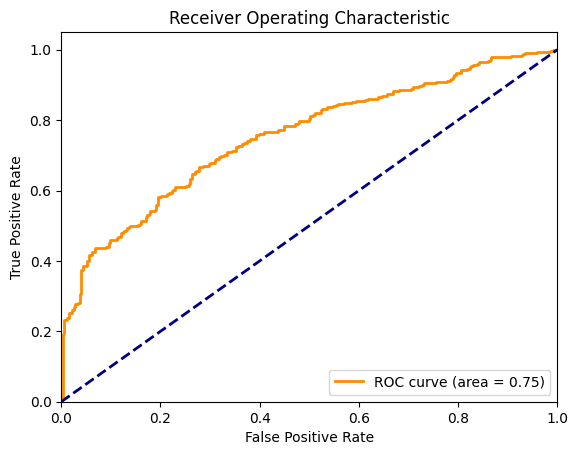

Test Recall: 0.6561514195583596
Test Precision: 0.697986577181208


In [ ]:
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score

# Calculate Accuracy
print('Training Accuracy:', accuracy_score(y_tr_pred.T, y_tr_arr))
print('Test Accuracy:', accuracy_score(y_ts_pred.T, y_ts_arr))

# ROC Curve and AUC for Test Set
fpr, tpr, thresholds = roc_curve(y_ts_arr, final_test_pred.T)
roc_auc = auc(fpr, tpr)
print('Test AUC:', roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate Recall and Precision
recall = recall_score(y_ts_arr, y_ts_pred.T)
precision = precision_score(y_ts_arr, y_ts_pred.T)
print('Test Recall:', recall)
print('Test Precision:', precision)


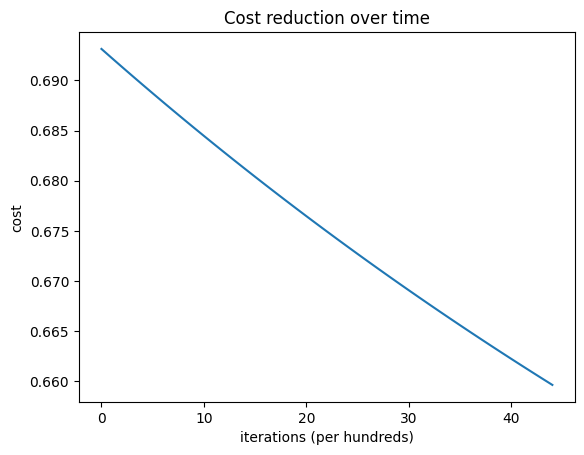

In [ ]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

We'll first generalize to n layers, once we have the n-layered ensemble ready then we shall evaluate adding one layer at a time.

#### I went through all the 1, 2, 3, 4-layered ensembles and derived ensemble probabilities and analytical gardiet formulas before starting with generalization. <br>For this task I worked with single, double, tripple and quadruple layer ensemble models<br>Used algebraic manipulation and mathematical law of induction to arrive at recurcive equations for ensemble probability and gradients.

## Task 4 : Generalized model to support arbitrary number of layers
---------------------------------------------------------------------------------------------
$\text{The following is the result of a lot of patience and rigorous manipulation, along with algebraic calculations.}$<br>
$\text{Every formula derived here by pen and verified multiple times for different layers and input attribute combinations.}$<br>
$\text{Old school way!}$

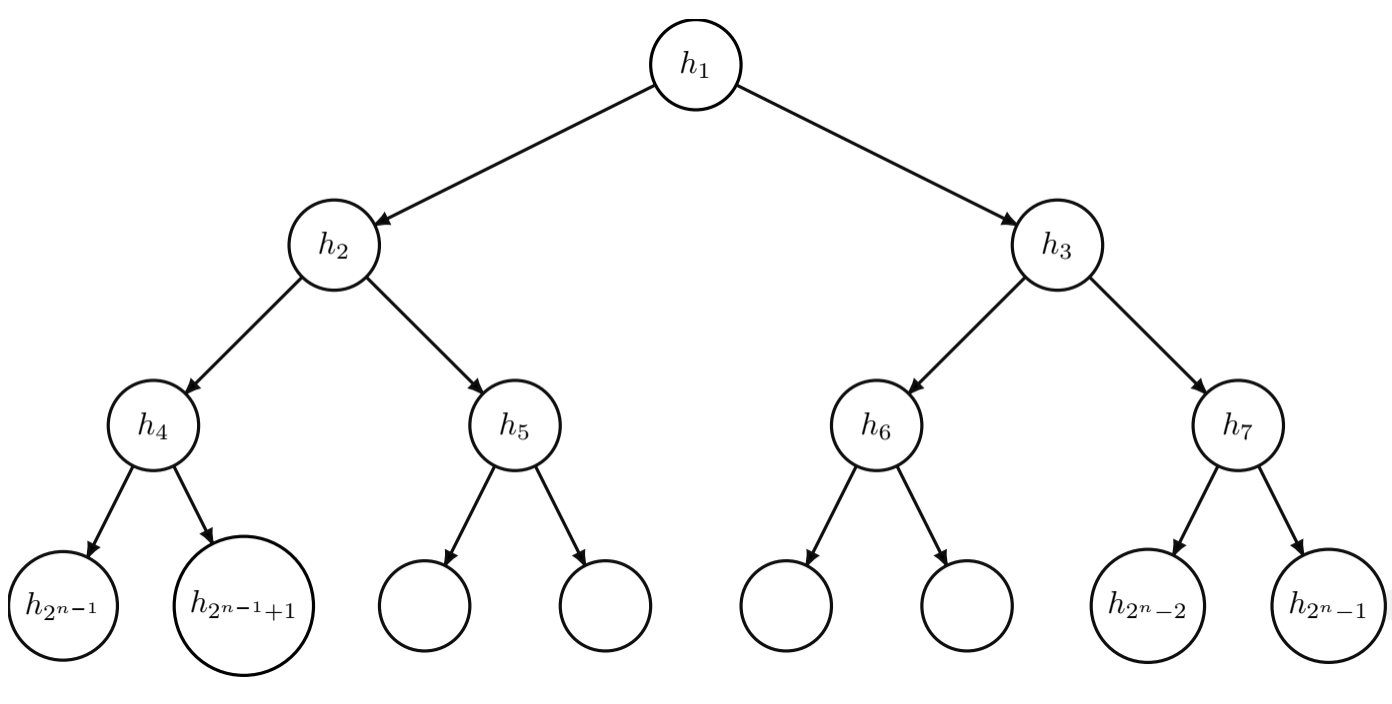

$\text{Let's talk about the ensemble probability which we are going to use in our Maximum likelihood calculation.}$

Here $h$ gives the probability of in-group or left.

For 1 Layer:
$$\large P(1|x_{i}) = h_{1}(x)$$

For 2 Layers: (The following is simply a result of rearranging the formula given in the problem statement)
$$\large P(1|x_{i}) = h_{1}(x)[h_{2}(x) - h_{3}(x)] + h_{3}(x)$$
Where $h_{1}$ is the top node, $h_{2}$ is the left node, and $h_{3}$ is the right leaf.

For 3 Layers: (The following is simply a result of rearranging)
$$\large P(1|x_{i}) = h_{1}(x) \Bigg( \Big[ h_{2}(x)(h_{4}(x)-h_{5}(x))+h_{5}(x) \Big] - \Big[ h_{3}(x)(h_{6}(x)-h_{7}(x))+h_{7}(x) \Big] \Bigg) + \Big[ h_{3}(x)(h_{6}(x)-h_{7}(x))+h_{7}(x) \Big]$$
Where $h_{4}, h_{5}, h_{6}, h_{7}$ are leaf nodes.

I also have a derived formula for 4 layers which has 27 entities in it with new leafs from 8 to 15. I am not putting the gigantic formula here, but it sure helped in establishing the following. This gives a quick insight into how to generalize the formula for $N$ layers.

Each new leaf node of the previous iteration expands into the new formula using a rule: If $h_{j}$ is a leaf node of a tree with $n$ layers, adding one more layer to the ensemble would modify only the last layer leafs in the existing $n$-layer formula by accommodating new leaf probabilities of $n+1$ layer by converting the existing last layer leafs inside the existing formula and replacing as follows:
$$\large h_{j}(x) \Rightarrow [h_{j}(x)(h_{2j}(x) - h_{2j+1}(x)) + h_{2j+1}(x)]$$

So, this will become the basis of our ensemble's probability calculation.


Now the above works to expand for the probability of in-group, what if we want a generalized probability overall. So, for that we come with the generalized recursion rules that accomodate for that. Which is going to become the heart and core of Likelihood, cost and gradients.<br>

For $2j < 2^{(n-1)}$:
$$
\begin{equation}
h_j(x_i) \Rightarrow h_j(x)\left[h_{2j}(x) - h_{2j+1}(x)\right] + h_{2j+1}(x),
\end{equation}
$$
For the final layer, where $2j \geq 2^{(n-1)}$, the rule is:
$$
\begin{equation}
\begin{aligned}
h_j(y|x_i) \Rightarrow &\ h_j(x) \Big( h_{2j}(x)^y \left(1-h_{2j}(x)\right)^{(1-y)} \\
& \quad - h_{2j+1}(x)^y \left(1-h_{2j+1}(x)\right)^{(1-y)} \Big) \\
& \quad + h_{2j+1}(x)^y \left(1-h_{2j+1}(x)\right)^{(1-y)}
\end{aligned}
\end{equation}
$$

$\text{Maximum likelihood formula generalized to n - layer ensemble of logistic regression models}$

$$
{\large
\begin{align*}
L(n) &= \prod_{k=1}^{K} \left[ P(y_k|x_k,n)\right]
\end{align*}
}
$$

$\text{Therefore, the cost function for the n layer ensemble is given by}$

$$
{\large
\begin{align*}
\text{cost}(n) &= -\sum_{k=1}^{K} log(P(y_k|x_k,n))
\end{align*}
}
$$

We introduce the following notations:


- $P_n$: Ensemble probability calculated recursively using the rules or recursion we derived earlier for an $n$-layer ensemble.
- $h_j$: Probability at the $j$-th node, defined as $h_j = \frac{1}{1+e^{-z_j}}$.
- $p_j$: Term defined as $h_j^y (1-h_j)^{1-y}$ for the $j$-th node.
- $w_{ji}$: Coefficient of the feature variable $x_i$ in $z_j$ for the $j$-th node.
- $c_n$: Cost contributed by a data point in an $n$-layered ensemble.
- $p_{\wedge}(n,j)$: Path probability of the $j$-th node as a leaf in an $n$-layered ensemble.



$\text{Path Probability}$

\begin{equation}
p_{\wedge}(n,j) = p_{\wedge}\left(n-1,\left\lfloor \frac{j}{2} \right\rfloor \right)
h_{\left\lfloor \frac{j}{2} \right\rfloor}^{(1+j) \bmod 2}
\left(1-h_{\left\lfloor \frac{j}{2} \right\rfloor}\right)^{j \bmod 2}
\end{equation}

\begin{equation}
p_{\wedge}(1,1) = 1
\end{equation}

$\text{Weight Gradients}$

For leaf nodes $(j\geq2^{n-1})$:
\begin{equation}
\frac{\partial c_n}{\partial w_{ji}} = -\frac{p_{\wedge}(n,j) p_j (y-h_j)x_i}{P_n}
\end{equation}

For immediate parents of leaf nodes $(2^{n-2}\leq j < 2^{n-1})$:

\begin{equation}
\frac{\partial c_n}{\partial w_{ji}} = \frac{\partial c_{n-1}}{\partial w_{ji}}\frac{h_j(1-h_j)(p_{2j}-p_{2j+1})P_{n-1}}{p_j (y-h_j) P_n}
\end{equation}

or equivalently:

\begin{equation}
\frac{\partial c_n}{\partial w_{ji}} = -\frac{p_{\wedge}(n-1,j) h_j (1-h_j) (p_{2j}-p_{2j+1}) x_i}{P_n}
\end{equation}

For other nodes $(j < 2^{n-2}, n>2)$, calculate the gradient as if the ensemble were of $\lfloor \log_2{j} + 2 \rfloor$ layers when the node belonged to the second last layers hence prompting to use equation \ref{eq:n_layer_par_cost_grad}. Update all terms of the form $p_k$ in that gradient using the following recursive rule applied $n-\lfloor \log_2{j} + 2 \rfloor$ times while ignoring the contents of $P$ as shown in equation \ref{eq:grad_rule_recursion} or \ref{eq:grad_final}:

\begin{equation}
p_k \Rightarrow h_k(p_{2k} - p_{2k+1}) + p_{2k+1}
\end{equation}

This gradient update process can be described as follows:

\begin{equation}
\left(\frac{\partial c_{\lfloor \log_2{j} + 2 \rfloor}}{\partial w_{ji}}\right)^{(a+1)} = \left(\frac{\partial c_{\lfloor \log_2{j} + 2 \rfloor}}{\partial w_{ji}}\right)^{(a)}
\end{equation}
\noindent
with $p_k$ replaced by $h_k(p_{2k} - p_{2k+1}) + p_{2k+1}$
for \( a = 0, 1, \dots, n-\lfloor \log_2{j} + 2 \rfloor-1 \),

where
\begin{equation}
\frac{\partial c_{\lfloor \log_2{j} + 2 \rfloor}}{\partial w_{ji}}^{(0)} = \frac{\partial c_{\lfloor \log_2{j} + 2 \rfloor}}{\partial w_{ji}}
\end{equation}
is the initial gradient, and
\begin{equation}
\frac{\partial c_{\lfloor \log_2{j} + 2 \rfloor}}{\partial w_{ji}}^{(n-\lfloor \log_2{j} + 2 \rfloor)}
\end{equation}
is the updated gradient after \( n-\lfloor \log_2{j} + 2 \rfloor \) iterations.

The final gradient is then given by:

\begin{equation}
\frac{\partial c_n}{\partial w_{ji}} = \left(\frac{\partial c_{\lfloor \log_2{j} + 2 \rfloor}}{\partial w_{ji}}\right)^{(n-\lfloor \log_2{j} + 2 \rfloor)}\frac{P_{\lfloor \log_2{j} + 2 \rfloor}}{P_n}
\end{equation}

or equivalently:

\begin{equation}
\begin{aligned}
\frac{\partial c_n}{\partial w_{ji}} &= -\frac{p_{\wedge}(\lfloor \log_2{j} + 2 \rfloor-1,j) h_j (1-h_j)  x_i}{P_n} \\
&\quad \times \left((p_{2j}-p_{2j+1})\right)^{(n-\lfloor \log_2{j} + 2 \rfloor)}
\end{aligned}
\end{equation}

Here, $(p_{2j}-p_{2j+1})$ is going to be recursively updated with the same rule in equation $(n-\lfloor \log_2{j} + 2 \rfloor)$ times.

For calculating Bais gradients, $x_i$ becomes $1$.


$\text{Where }x_i \text{ is }i^{th} \text{ feature/attribute and }a_j \text{ is probability from }j^{th}\text{ node from the ensemble:}$

$$\large a_j={\frac {1}{1+e^{-(z_j)}}}=h_{j}(x)$$

$\text{Where }z_j \text{ is :}$

$$\large z_j = w_{j1}x_1 + w_{j2}x_2 + w_{j3}x_3 + ... + w_{ji}x_i + ...+ w_{jf}x_f + b_j$$

$\text{Where }f \text{ is the total number of features present.}$

In the above and below function we are performing a one time calculation and storing them in numpy array so that we do not need to compute them again and again in each epoch. These calculations are based on the formulas which are derived above.

The following is the place we initialize randome weights and also making sure we do the one time calculations and take them from here.

In [6]:
def weightInitialization(n_features,n_layers, seed=None):
    if seed is not None:
        np.random.seed(seed)  # Initialize the random seed for reproducibility
    w = np.random.rand(abs(np.power(2,n_layers)-1), n_features) #np.zeros((1,n_features))  # 2D array for weights
    b = np.reshape(np.zeros(abs(np.power(2,n_layers)-1)), (abs(np.power(2,n_layers)-1), 1)) #np.random.rand(1, n_layers)
    return w, b
    # w[value-1 node, value-1 feature]

In [7]:
def h(j,w,b,X):
    return 1/(1+np.exp(-(np.dot(w[int(j-1),:],X.T)+b[int(j-1),:])))

In [8]:
def p_path_probability(n_layers,j,w,b,X):
    if j == 1:
        return 1
    return p_path_probability(n_layers-1,np.floor((j)/2),w,b,X) * (h(np.floor((j)/2),w,b,X)**((j+1)%2)) * ((1-h(np.floor((j)/2),w,b,X))**((j)%2))

In [9]:
def P(Y,X,n_layers,w,b,node=1):
    if n_layers==1:
        return (h(node,w,b,X)**Y) * ((1-h(node,w,b,X))**(1-Y))
    if 2*node < 2**(n_layers-1):
        return (h(node,w,b,X) * (P(Y,X,n_layers,w,b,2*node) - P(Y,X,n_layers,w,b,2*node+1))) + P(Y,X,n_layers,w,b,2*node+1)
    elif 2*node >= 2**(n_layers-1):
        return (h(node,w,b,X) * (((h(2*node,w,b,X)**Y) * ((1-h(2*node,w,b,X))**(1-Y))) - ((h(2*node+1,w,b,X)**Y) * ((1-h(2*node+1,w,b,X))**(1-Y)))) )+ ((h(2*node+1,w,b,X)**Y) * ((1-h(2*node+1,w,b,X))**(1-Y)))

In [10]:
def p_k(j,w,b,X,Y):
    return (h(j,w,b,X)**Y) * ((1-h(j,w,b,X))**(1-Y))

In [11]:
def update_gradient(w,b,X,Y,n_layers,node,j,count):
  if count == n_layers-np.floor(np.log2(j)+2):
    return (h(node,w,b,X) * (((h(2*node,w,b,X)**Y) * ((1-h((2*node),w,b,X))**(1-Y))) - ((h(2*node+1,w,b,X)**Y) * ((1-h(2*node+1,w,b,X))**(1-Y))))) + ((h(2*node+1,w,b,X)**Y) * ((1-h(2*node+1,w,b,X))**(1-Y)))
  else:
    count = count + 1
    return (h(node,w,b,X) * (update_gradient(w,b,X,Y,n_layers,2*node,j,count) - update_gradient(w,b,X,Y,n_layers,2*node+1,j,count))) + update_gradient(w,b,X,Y,n_layers,2*node+1,j,count)

In [12]:
def calculate_gradient(p_ensemble, w, b, X, Y, n_layers):
    m = X.shape[0]  # Number of samples
    n_nodes = w.shape[0]  # Number of nodes
    w_gradient = np.zeros_like(w)  # Adjusting shape initialization
    b_gradient = np.zeros_like(b)  # Adjusting shape initialization
    for j in range(n_nodes):
        if j+1 >= 2**(n_layers-1):
            p_path = p_path_probability(n_layers, j+1, w, b, X)
            h_val = h(j+1, w, b, X)
            gradient_component = (p_path * (h_val**Y) * ((1-h_val)**(1-Y)) * (Y-h_val) / p_ensemble)
            w_gradient[j] = -np.mean(np.dot(X.T, gradient_component.T), axis=1)  # Take mean along samples to get shape (10,)
            b_gradient[j] = -np.mean(gradient_component)

        elif 2**(n_layers-2) <= j+1 < 2**(n_layers-1):
            p_path = p_path_probability(n_layers-1, j+1, w, b, X)
            h_val = h(j+1, w, b, X)
            h_val2 = h(2*(j+1), w, b, X)
            h_val3 = h(2*(j+1)+1, w, b, X)
            gradient_component = (p_path * h_val * (1-h_val) * (((h_val2**Y) * ((1-h_val2)**(1-Y))) - ((h_val3**Y) * ((1-h_val3)**(1-Y)))))/p_ensemble
            w_gradient[j] = -np.mean(np.dot(X.T, gradient_component.T), axis=1)  # Take mean along samples to get shape (10,)
            b_gradient[j] = -np.mean(gradient_component)

        elif n_layers > 2 and j+1 < 2**(n_layers-2):
            p_path = p_path_probability(np.floor(np.log2(j+1)+2)-1, j+1, w, b, X)
            h_val = h(j+1, w, b, X)
            gradient_component = (p_path * h_val * (1-h_val) * (update_gradient(w, b, X, Y, n_layers, 2*(j+1), j+1, 1) - update_gradient(w, b, X, Y, n_layers, 2*(j+1)+1, j+1, 1)))/p_ensemble
            w_gradient[j] = -np.mean(np.dot(X.T, gradient_component.T), axis=1)  # Take mean along samples to get shape (10,)
            b_gradient[j] = -np.mean(gradient_component)

    return w_gradient, b_gradient


In [13]:
def model_optimize(w, b, X, Y,n_layers=1):
    m = X.shape[0]
    p_ensemble = P(Y,X,n_layers,w,b)
    # Look for zeros in p_ensemble and replace it with 0.00000000001
    p_ensemble[p_ensemble == 0] = 0.00000000001
    cost = (-1/m)*(np.sum(np.log(p_ensemble)))

    dw,db = calculate_gradient(p_ensemble, w, b, X, Y, n_layers)
    grads = {"dw": dw, "db": db}

    return grads, cost


In [14]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y.T)
        #
        dw = grads["dw"]
        db = grads["db"]

        #weight update
        w = w - (learning_rate * (dw))
        b = b - (learning_rate * db)
        #

        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))

    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}

    return coeff, gradient, costs

In [15]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] >= 0.5:
            y_pred[0][i] = 1
    return y_pred

Number of Features 10
Shape of w (1, 10)
Shape of b (1, 1)
Shape of X (2558, 10)
Shape of Y (2558, 1)
Optimized weights [[ 0.35353864 -0.74541878 -0.43104876  0.01397732 -0.10640553 -0.12196064
  -0.52277415  0.08181226  0.43811447  1.1045718 ]]
Optimized intercept [[0.0210063]]
Training Accuracy 0.743549648162627
Test Accuracy 0.7375
Test AUC: 0.8019161840396127
Test Recall: 0.668769716088328
Test Precision: 0.7709090909090909


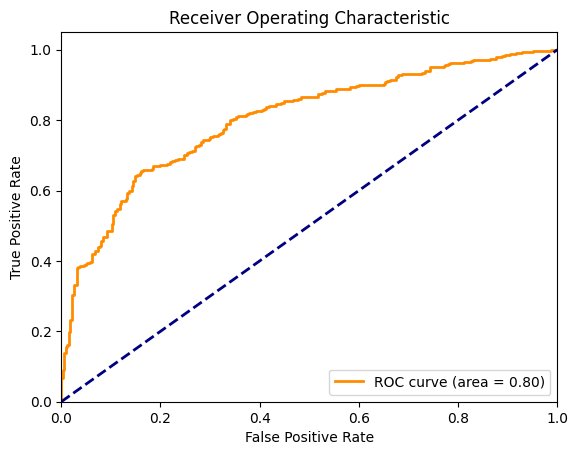

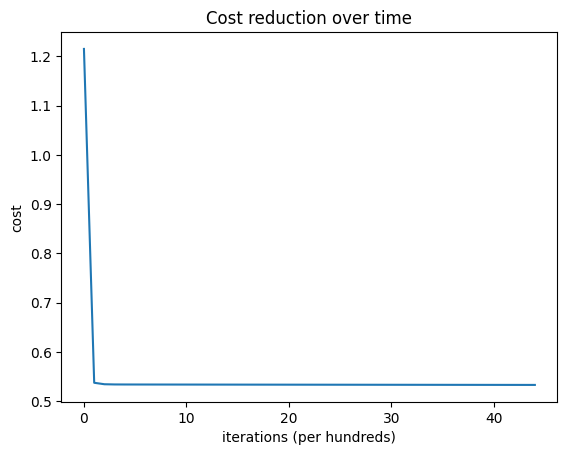

In [ ]:
n_layers = 1
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b= weightInitialization(n_features,n_layers)


#weightInitialization(n_features,n_layers)
print("Shape of w",w.shape)
print("Shape of b",b.shape)
print("Shape of X",X_tr_arr.shape)
print("Shape of Y",y_tr_arr.shape)

#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
# w = fit(X_tr_arr, y_tr_arr, w, n_layers)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = P(1,X_tr_arr,n_layers,w,b) #ensemble_probability(w,b,X_tr_arr,n_layers)#sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = P(1,X_ts_arr,n_layers,w,b) #ensemble_probability(w,b,X_ts_arr,n_layers)#sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred.reshape(1,-1), m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred.reshape(1,-1), m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score

# # Calculate Accuracy
print('Training Accuracy:', accuracy_score(y_tr_pred.T, y_tr_arr))
print('Test Accuracy:', accuracy_score(y_ts_pred.T, y_ts_arr))

# ROC Curve and AUC for Test Set
fpr, tpr, thresholds = roc_curve(y_ts_arr, final_test_pred.T)
roc_auc = auc(fpr, tpr)
print('Test AUC:', roc_auc)

# Calculate Recall and Precision
recall = recall_score(y_ts_arr, y_ts_pred.T)
precision = precision_score(y_ts_arr, y_ts_pred.T)
print('Test Recall:', recall)
print('Test Precision:', precision)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

For faster convergence to a solution:

In [ ]:
from scipy.optimize import minimize,fmin_tnc,fmin_l_bfgs_b

def cost_function(n_theta, x, y,n_layers):
    m = x.shape[0]  # number of samples
    n_features = x.shape[1]
    w = n_theta.reshape(2**n_layers-1,n_features)
    b = np.zeros((2**n_layers-1,1))
    p_ensemble = P(y,x,n_layers,w,b)
    p_ensemble[p_ensemble == 0] = 1e-10  # Avoid log(0)
    cost = (-1 / m) * (np.sum(np.log(p_ensemble)))
    return cost

def gradient(theta, x, y,n_layers):

    eps=0.001
    nodes = (2**n_layers)-1
    n=len(theta)//nodes
    eps_array=np.array([[eps*(i==j) for j in range(nodes*n)] for i in range(nodes*n)])
    new_theta=theta+eps_array

    G=(np.array([cost_function(t, x, y,n_layers) for t in new_theta])-cost_function(theta, x, y,n_layers))/eps

    return G


def fit(x, y, theta,n_layers):
    opt_weights = fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(x, y.flatten(),n_layers))
    return opt_weights[0]

## Task 2 : 2 Layer ensemble model

For convergence to a better solution, along with cost decay:

In [16]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


def cost_function(n_theta, x, y, n_layers):
    m = x.shape[0]  # number of samples
    n_features = x.shape[1]
    w = n_theta.reshape(2**n_layers - 1, n_features)
    b = np.zeros((2**n_layers - 1, 1))
    p_ensemble = P(y, x, n_layers, w, b)
    p_ensemble[p_ensemble == 0] = 1e-10  # Avoid log(0)
    cost = (-1 / m) * np.sum(np.log(p_ensemble))
    return cost

def gradient(theta, x, y, n_layers):
    eps = 1e-5
    grad = np.zeros_like(theta)
    for i in range(len(theta)):
        theta_eps = theta.copy()
        theta_eps[i] += eps
        cost1 = cost_function(theta_eps, x, y, n_layers)
        cost0 = cost_function(theta, x, y, n_layers)
        grad[i] = (cost1 - cost0) / eps
    return grad

def callback(theta):
    cost = cost_function(theta, X_tr_arr, y_tr_arr.flatten(), n_layers)
    cost_history.append(cost)

def fit(x, y, theta, n_layers):
    res = minimize(
        fun=cost_function,
        x0=theta,
        args=(x, y.flatten(), n_layers),
        method='L-BFGS-B',
        jac=gradient,
        callback=callback
    )
    return res.x

Number of Features: 10
Optimized Parameters:
[[-4.61037928  0.09822066 -0.35143995 -0.08289949  8.76272762  2.26270083
   2.42783794 -4.93337452  1.09494011  2.57633337]
 [ 0.03656775 -0.84939371 -0.69019736  0.29741887  0.24438287 -0.20883022
  -0.70459502 -0.26914705  0.09206383  2.20900473]
 [ 0.29253139 -0.55017213 -0.34914508 -0.28992374 -0.99835622 -0.06585291
  -0.12117663 -0.22840581  1.31624581  0.59119931]]
Training Accuracy: 0.7576231430805317
Test Accuracy: 0.7546875
Test AUC: 0.8257464034924944
Test Recall: 0.6971608832807571
Test Precision: 0.7836879432624113


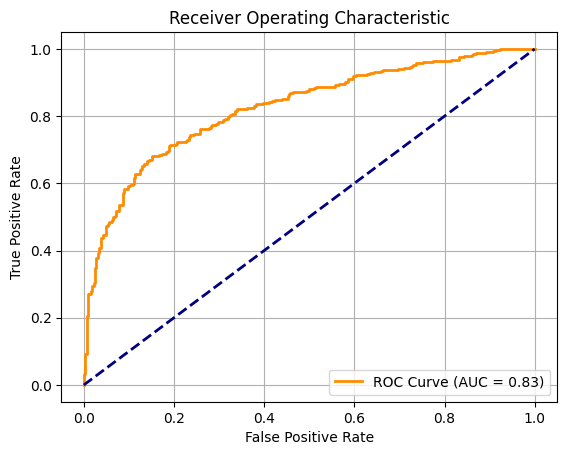

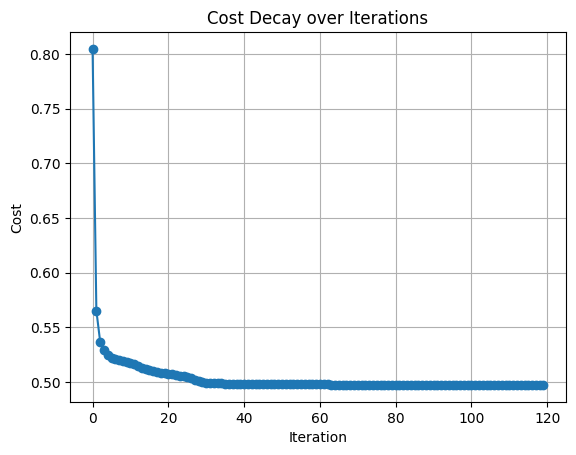

In [ ]:
n_layers = 2
# Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features:', n_features)

# Initialize weights
w, b = weightInitialization(n_features, n_layers)

# Initialize an empty list to store the cost history
cost_history = []

theta = w.flatten()
parameters = fit(X_tr_arr, y_tr_arr, theta, n_layers)

w_opt = parameters.reshape(w.shape)

print('Optimized Parameters:')
print(w_opt)

# Final prediction
final_train_pred = P(1, X_tr_arr, n_layers, w_opt, b)
final_test_pred = P(1, X_ts_arr, n_layers, w_opt, b)
m_tr = X_tr_arr.shape[0]
m_ts = X_ts_arr.shape[0]

# Evaluate the performance
y_tr_pred = predict(final_train_pred.reshape(1, -1), m_tr)
y_ts_pred = predict(final_test_pred.reshape(1, -1), m_ts)

from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score

# Calculate Accuracy
print('Training Accuracy:', accuracy_score(y_tr_pred.T, y_tr_arr))
print('Test Accuracy:', accuracy_score(y_ts_pred.T, y_ts_arr))

# ROC Curve and AUC for Test Set
fpr, tpr, thresholds = roc_curve(y_ts_arr, final_test_pred.T)
roc_auc = auc(fpr, tpr)
print('Test AUC:', roc_auc)

# Calculate Recall and Precision
recall = recall_score(y_ts_arr, y_ts_pred.T)
precision = precision_score(y_ts_arr, y_ts_pred.T)
print('Test Recall:', recall)
print('Test Precision:', precision)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Cost Decay
plt.figure()
plt.plot(cost_history, marker='o')
plt.title('Cost Decay over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


## Task 3 : 3 Layer ensemble model

Number of Features: 10


<ipython-input-7-34e23fd2031e>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-(np.dot(w[int(j-1),:],X.T)+b[int(j-1),:])))


Optimized Parameters:
[[ 7.41840174e-01  4.83526842e-01 -3.77109865e-01 -3.63309387e-01
   4.99681565e-02  7.94590643e-01 -7.71799233e-01  1.33351240e+00
   3.77338430e-01 -1.21784683e+00]
 [-2.82224630e+02  9.18117807e+01 -2.07292569e+02  4.05994294e+01
   3.83030898e+02  2.43648133e+02  3.01611032e+01 -2.91303518e+02
   2.42335268e+02  3.18266462e+02]
 [ 2.51462516e+02 -4.77093773e+01 -3.51280000e+02  1.41321815e+02
   4.32068329e+02  4.35868953e+02 -7.03428610e+01  4.06583231e+01
  -2.35485070e+01 -2.55387242e+02]
 [ 2.43936572e+00 -1.58182130e+00 -2.00444839e+00 -7.30274059e-01
  -3.13276981e+00 -8.95832881e-01 -2.08325505e+00  1.04858373e+00
   6.37494360e-01  3.14897279e+00]
 [ 2.73342067e-01 -6.47711324e-01 -7.10610844e-01 -2.28896287e-01
  -1.49458556e+00 -2.70071293e-01  1.22601823e+00 -1.60216539e+00
   2.23087334e+00 -4.33845799e-01]
 [-4.86418437e+02  1.79409342e+02  4.60898071e+01  1.54502693e+02
   6.14615039e+02  2.08946922e+02 -3.44258656e+02  3.16265023e+02
   2.725848

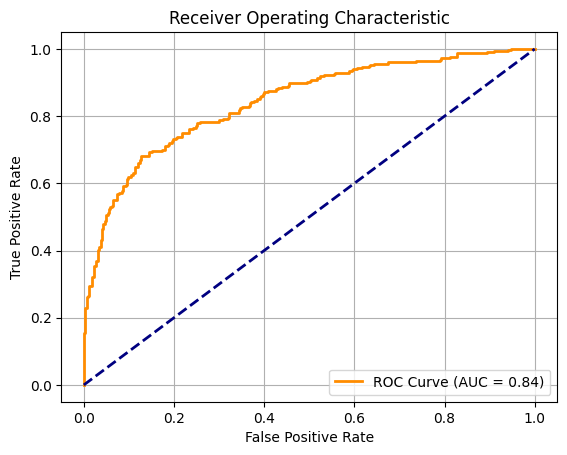

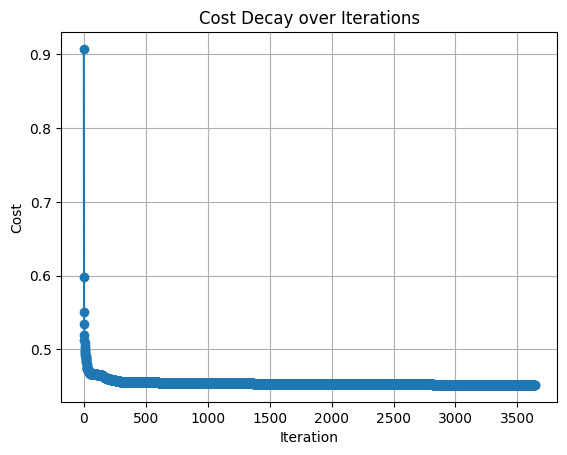

In [ ]:
n_layers = 3
# Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features:', n_features)

# Initialize weights
w, b = weightInitialization(n_features, n_layers)

# Initialize an empty list to store the cost history
cost_history = []

theta = w.flatten()
parameters = fit(X_tr_arr, y_tr_arr, theta, n_layers)

w_opt = parameters.reshape(w.shape)

print('Optimized Parameters:')
print(w_opt)

# Final prediction
final_train_pred = P(1, X_tr_arr, n_layers, w_opt, b)
final_test_pred = P(1, X_ts_arr, n_layers, w_opt, b)
m_tr = X_tr_arr.shape[0]
m_ts = X_ts_arr.shape[0]

# Evaluate the performance
y_tr_pred = predict(final_train_pred.reshape(1, -1), m_tr)
y_ts_pred = predict(final_test_pred.reshape(1, -1), m_ts)

from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score

# Calculate Accuracy
print('Training Accuracy:', accuracy_score(y_tr_pred.T, y_tr_arr))
print('Test Accuracy:', accuracy_score(y_ts_pred.T, y_ts_arr))

# ROC Curve and AUC for Test Set
fpr, tpr, thresholds = roc_curve(y_ts_arr, final_test_pred.T)
roc_auc = auc(fpr, tpr)
print('Test AUC:', roc_auc)

# Calculate Recall and Precision
recall = recall_score(y_ts_arr, y_ts_pred.T)
precision = precision_score(y_ts_arr, y_ts_pred.T)
print('Test Recall:', recall)
print('Test Precision:', precision)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Cost Decay
plt.figure()
plt.plot(cost_history, marker='o')
plt.title('Cost Decay over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


## 4 Layer ensemble model

Number of Features: 10


<ipython-input-7-34e23fd2031e>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-(np.dot(w[int(j-1),:],X.T)+b[int(j-1),:])))


Optimized Parameters:
[[ 1.58312527e+00  3.15069571e-01  1.03923394e+00 -1.50721653e-01
   4.52981600e-01  3.28622671e-01 -9.25607304e-01  2.13497953e+00
  -1.05572380e+00 -1.75094890e+00]
 [ 1.28664836e+00 -7.82039991e-01 -1.38890797e+00  1.12554733e+00
   1.43894474e+00 -9.40736993e-02 -7.43916921e-02  7.91416950e-01
  -2.17636686e+00 -9.48680078e-01]
 [-1.09195942e+02 -1.46932180e+02  1.60217425e+02  2.36028832e+02
   2.13052486e+02 -8.23742542e+01  2.97887861e+02 -3.20368111e+02
   1.53285480e+02 -1.67651839e+02]
 [ 3.48679864e+01  1.61608707e+01 -6.47720456e+01  3.64747967e+01
   3.17301549e+02  2.60174935e+02 -2.64100462e+01 -1.14154901e+02
  -6.65404630e+01  1.50405316e+02]
 [ 2.47916318e+02 -8.03608080e-01  1.75946781e+02  2.74160135e+02
   7.27459215e+01 -6.59661216e+01 -9.20290636e+01 -8.03680055e+01
  -1.85220757e+02  2.01536734e+02]
 [ 2.39937649e+02 -2.97120845e+01 -1.52287807e+01  9.62711484e+01
   1.39291938e+02 -3.10152660e+01 -8.76761203e+01 -1.22123798e+02
  -1.453691

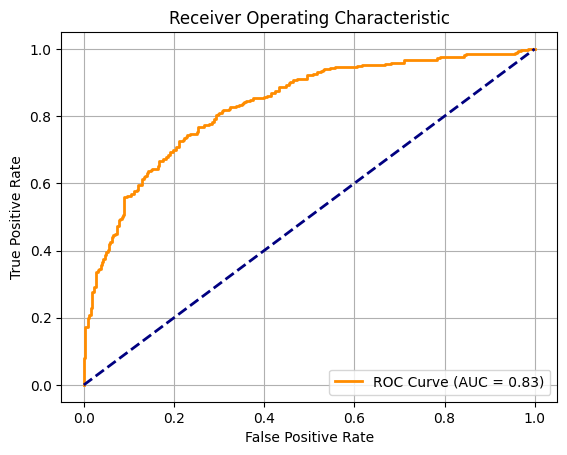

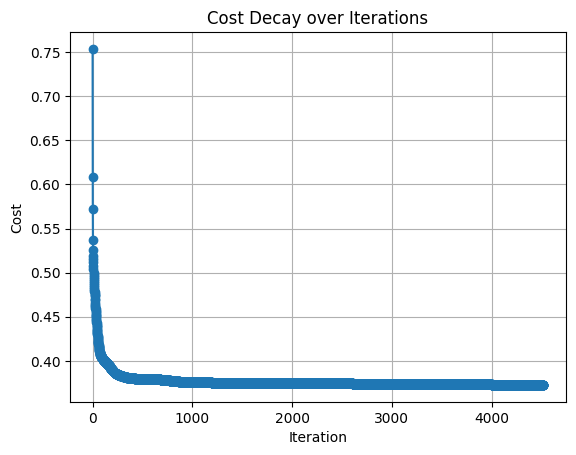

In [17]:
n_layers = 4
# Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features:', n_features)

# Initialize weights
w, b = weightInitialization(n_features, n_layers)

# Initialize an empty list to store the cost history
cost_history = []

theta = w.flatten()
parameters = fit(X_tr_arr, y_tr_arr, theta, n_layers)

w_opt = parameters.reshape(w.shape)

print('Optimized Parameters:')
print(w_opt)

# Final prediction
final_train_pred = P(1, X_tr_arr, n_layers, w_opt, b)
final_test_pred = P(1, X_ts_arr, n_layers, w_opt, b)
m_tr = X_tr_arr.shape[0]
m_ts = X_ts_arr.shape[0]

# Evaluate the performance
y_tr_pred = predict(final_train_pred.reshape(1, -1), m_tr)
y_ts_pred = predict(final_test_pred.reshape(1, -1), m_ts)

from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score

# Calculate Accuracy
print('Training Accuracy:', accuracy_score(y_tr_pred.T, y_tr_arr))
print('Test Accuracy:', accuracy_score(y_ts_pred.T, y_ts_arr))

# ROC Curve and AUC for Test Set
fpr, tpr, thresholds = roc_curve(y_ts_arr, final_test_pred.T)
roc_auc = auc(fpr, tpr)
print('Test AUC:', roc_auc)

# Calculate Recall and Precision
recall = recall_score(y_ts_arr, y_ts_pred.T)
precision = precision_score(y_ts_arr, y_ts_pred.T)
print('Test Recall:', recall)
print('Test Precision:', precision)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Cost Decay
plt.figure()
plt.plot(cost_history, marker='o')
plt.title('Cost Decay over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
